(3, 3)
[[0.]
 [0.]
 [0.]]
initial ahat [[-0.16802359 -0.50185322  3.01893683]
 [ 0.61092477 -0.31578992 -0.04349675]
 [-1.74672313 -2.42567626  0.51610356]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1000, 3, 1)


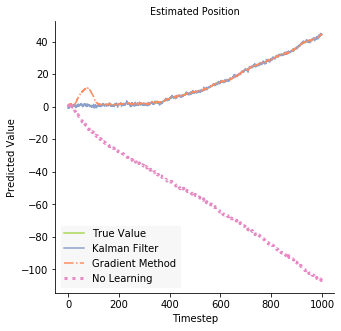

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


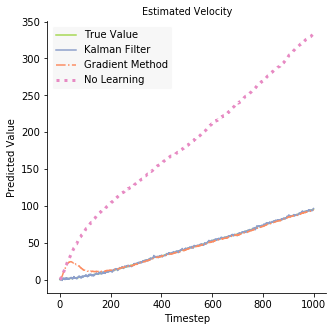

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


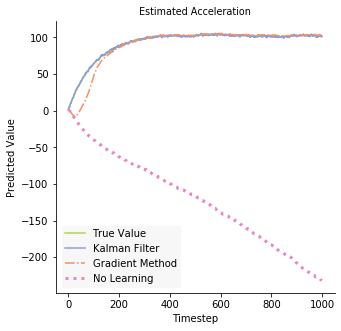

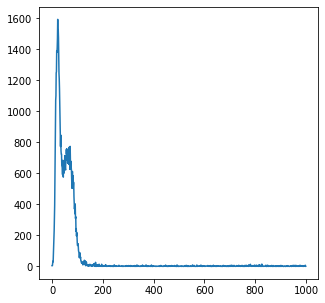

In [10]:
!pip install brewer2mpl
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
import matplotlib as mp
import seaborn as sns
import brewer2mpl

bmap = brewer2mpl.get_map("Set2", 'qualitative',7)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5, 5],
   'font.family': 'sans-serif'
   }
mp.rcParams.update(params)


dt = 0.001
A = np.array([[1, dt, 0.5 * dt**2],
     [0,1,dt],
     [0,0,1]])
x = np.array([0,0,0]).reshape(3,1)
#C = np.identity(3)
C = np.random.normal(0,1,[3,3])
print(C.shape)
print(np.dot(A,x))
def u_fun(t):
  return np.exp(-0.01 * t)

us = []
xs = []
ys = []
B = np.array([0,0,1]).reshape(3,1)

xhat = np.array([0.0,0.0,0.0]).reshape(3,1)
phat = np.identity(3)
Q = np.identity(3)
R = np.identity(3)
xhats = []
phats = []
xhat_grad = xhat
phat_grad = np.copy(phat)
xhat_grads = []
Ahat = np.random.normal(0,1,[3,3])
Chat = C + np.random.normal(0,0.0001,[3,3])
Bhat = np.random.normal(0,1,[3,1])
xhat_grad_no_learning = np.copy(xhat_grad)
no_learning = []
init_ahat = np.copy(Ahat)
init_bhat = np.copy(Bhat)
Ls = []
print("initial ahat", Ahat)
N=1000
for i in range(N):
  u = u_fun(i)
  x = np.dot(A,x) + np.dot(B,u) + np.random.normal(0,0.1,[3,1])
  y = np.dot(C, x) + np.random.normal(0,1,[3,1])
  xhat_proj = np.dot(A,xhat) + np.dot(B,u)
  phat_proj = np.dot(A, np.dot(phat, A.T)) + Q
  K = np.dot(np.dot(phat_proj, C.T), LA.inv(np.dot(np.dot(C,phat_proj),C.T) + R))
  xhat = xhat_proj + np.dot(K, y - np.dot(C,xhat_proj))
  phat = phat_proj - np.dot(K, np.dot(C, phat_proj))
  for i in range(20):
    ex = xhat_grad - (np.dot(Ahat, xhat_grad) + np.dot(Bhat,u))
    ey = y - np.dot(C, xhat_grad)
    dldmu = np.dot(phat_grad, ex) - np.dot(C.T, np.dot(R, ey))
    xhat_grad -= (0.01 * dldmu)

    Ahat_grad=   np.dot(phat_grad,np.dot(ex.reshape(3,1), xhat_grad.reshape(3,1).T))
    Ahat += 0.00001 * Ahat_grad
    Bhat_grad =  np.dot(ex.reshape(3,1), np.array(u).reshape(1,1).T)
    Bhat += 0.0001 * Bhat_grad
    #no learning

    ex_no_learning = xhat_grad_no_learning - (np.dot(init_ahat, xhat_grad_no_learning) + np.dot(init_bhat,u))
    ey_no_learning = y - np.dot(C, xhat_grad_no_learning)
    dldmu_no_learning = np.dot(phat_grad, ex_no_learning) - np.dot(C.T, np.dot(R, ey_no_learning))
    xhat_grad_no_learning -= (0.01 * dldmu_no_learning)


  L = np.sum(np.square(ey) + np.square(ex))
  Ls.append(L)

  xs.append(x)
  us.append(u)
  ys.append(y)
  xhats.append(xhat)
  phats.append(phat)
  xhat_grads.append(np.copy(xhat_grad))
  no_learning.append(np.copy(xhat_grad_no_learning))

def plot_graph(xs, xhats, xhat_grads, no_ahats, title):
  plt.plot(xs,label="True Value",color=colors[4])
  plt.plot(xhats, label="Kalman Filter",color=colors[2])
  plt.plot(xhat_grads, label="Gradient Method", linestyle='-.',color=colors[1])
  plt.plot(no_ahats, label="No Learning",linewidth=3, linestyle=":",color=colors[3])
  plt.title(title)
  leg = plt.legend()
  f = leg.get_frame()
  f.set_edgecolor('1')
  f.set_facecolor('0.96')
  plt.xticks(np.arange(0,1010,200))
  plt.xlabel('Timestep',fontsize=10)
  plt.ylabel("Predicted Value",fontsize=10)
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig(title + "_AB_matrix.eps", format="eps")
  plt.show()


xs = np.array(xs)
xhats = np.array(xhats)
xhat_grads = np.array(xhat_grads)
no_learning = np.array(no_learning)
ys = np.array(ys).reshape(N,3)
print(xs.shape)
plot_graph(xs[:,0], xhats[:,0], xhat_grads[:,0], no_learning[:,0],"Estimated Position")
plot_graph(xs[:,1], xhats[:,1], xhat_grads[:,1], no_learning[:,1],"Estimated Velocity")
plot_graph(xs[:,2], xhats[:,2], xhat_grads[:,2], no_learning[:,2],"Estimated Acceleration")
plt.plot(Ls)
plt.show()
#okay, so this works out great... so how well does the kalman filter perform in this pretty simple estimation issue? 

In [12]:
!ls
from google.colab import files
files.download("Estimated Acceleration_AB_matrix.eps")
files.download("Estimated Velocity_AB_matrix.eps")
files.download("Estimated Position_AB_matrix.eps")

'Estimated Acceleration_AB_matrix.eps'	'Estimated Velocity_AB_matrix.eps'
'Estimated Position_AB_matrix.eps'	 sample_data
